In [1]:
import sqlite3
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pathlib import Path
import warnings

from model import *

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
dbPath = Path("../data/data.sqlite")
if not dbPath.exists():
    # Avoid creating an empty database
    raise Exception("Database file does not exist")
con = sqlite3.connect(dbPath)

In [3]:
def query2BPMN(sql):
    df = pd.read_sql_query(sql, con)
    df["EVENTTIME"] = pd.to_datetime(df["EVENTTIME"], infer_datetime_format=True)
    log = pm4py.format_dataframe(df, case_id="_CASE_KEY", activity_key="ACTIVITY_EN", timestamp_key="EVENTTIME")
    net, initial_marking, final_marking = alpha_miner.apply(log)
    process_model = pm4py.discover_bpmn_inductive(log)
    pm4py.view_bpmn(process_model)
    avgProfit = df["Profit"].mean()
    avgCosts = df["Costs"].mean()
    avgRevenue = df["Revenue"].mean()
    avgRating = df["CustomerSatisfaction"].mean()
    medianDirations = pd.Series(pm4py.stats.get_all_case_durations(log)).median() / 60 # seconds to minutes
    print()
    print(f"{avgProfit = } € \n{avgCosts = } € \n{avgRevenue = } € \n{avgRating = } ⭐️\n {medianDirations = } minutes")
    print()
    # case durations
    print()

def query2Prediction(sql):
    print("RandomForrest:")
    res = predictProfitabilityAndCustomerSatisfactionBasedOnSQLQuery(con, sql)
    for i in res:
        algoPrinter(res[i])
        print()
        print()

def query2Info(whereClause="1=1"):
    query2BPMN(f"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                where """+whereClause+"""
                order by sorting
        """)
    query2Prediction('SELECT *, Revenue - Costs as "Profit" FROM Pizza_Case WHERE Variant != 5 and '+whereClause)

In [4]:
#query2BPMN("SELECT * FROM Pizza_Event")

## Analyse By Variant

['Variant = 1', 'Variant = 2', 'Variant = 3', 'Variant = 4', 'Variant = 5', 'Variant = 6', 'Variant = 7', 'Variant = 8', 'Variant = 9']


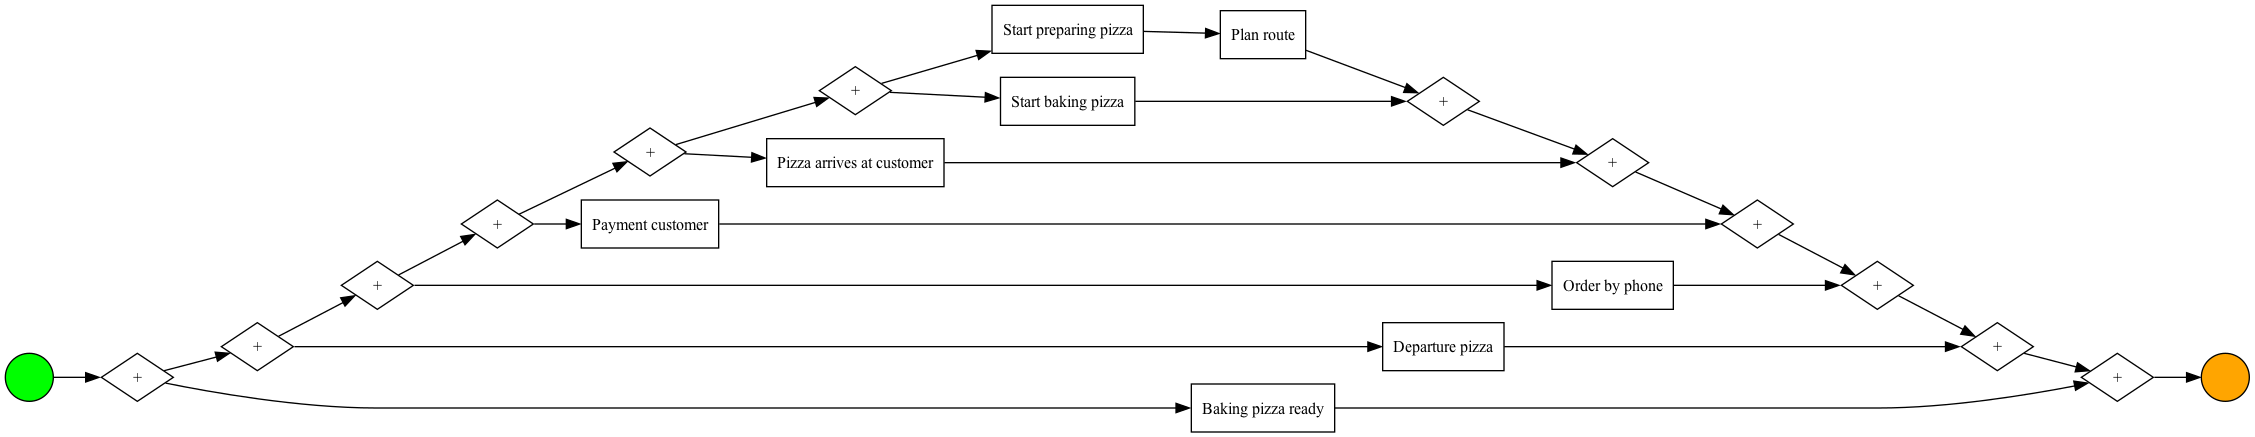


avgProfit = 7.932960893854749 € 
avgCosts = 15.273743016759777 € 
avgRevenue = 23.206703910614525 € 
avgRating = 2.474860335195531 ⭐️
 medianDirations = 41.0 minutes


RandomForrest:




/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3514.52it/s]




===
Accuracy: 0.5925925925925926
Recall: 0.48484848484848486
Precision: 0.3018867924528302
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.06774620393387282
Daytime: 0.09086472747764002
CustomerType_Adult: 0.016677801231147614
CustomerType_Senior: 0.007375671113248595
CustomerType_Student: 0.024062391552591333
CustomerType_Teenager: 0.017210106067191536
CustomerLocation_Munich District Five: 0.014354647976690615
CustomerLocation_Munich District Four: 0.013139189043806438
CustomerLocation_Munich District One: 0.02718021811808247
CustomerLocation_Munich District Three: 0.017677597491559265
CustomerLocation_Munich District Two: 0.017854280868627653
DistributionChannel_BestOrder Inc.: 0.021596270166313172
DistributionChannel_Deliver Now Holding: 0.02515218240857532
DistributionChannel_Deliveruu Inc.: 0.013343435858686732
DistributionChannel_Feedera SE: 0.02164682490261087
DistributionChannel_Heropizza Lmtd.: 0.00591196756740264
DistributionChannel_Orderly

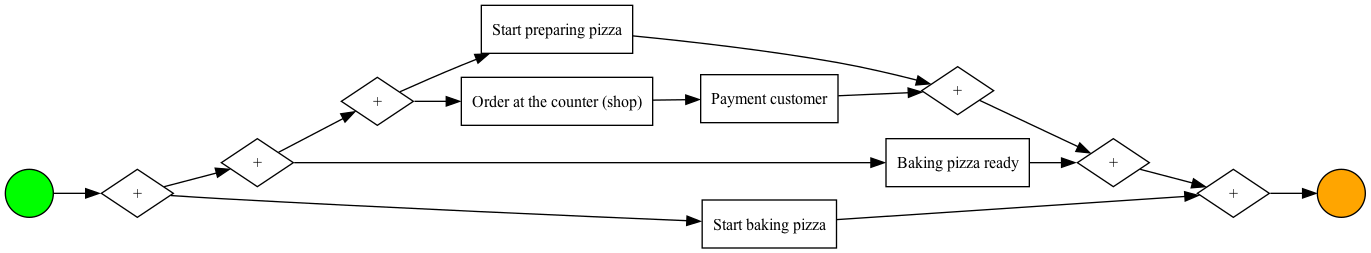


avgProfit = 6.656330749354005 € 
avgCosts = 15.31266149870801 € 
avgRevenue = 21.968992248062015 € 
avgRating = 3.7235142118863047 ⭐️
 medianDirations = 12.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3559.70it/s]




===
Accuracy: 0.6794871794871795
Recall: 0.525462962962963
Precision: 0.5663983903420523
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.04599876993272834
Daytime: 0.08760413817547469
CustomerType_Adult: 0.01538809128415094
CustomerType_Senior: 0.007552869672749553
CustomerType_Student: 0.022854174152082816
CustomerType_Teenager: 0.019369995974750413
CustomerLocation_Munich District Five: 0.013433740894016005
CustomerLocation_Munich District Four: 0.016446238254446008
CustomerLocation_Munich District One: 0.022511653806892018
CustomerLocation_Munich District Three: 0.02481956967104033
CustomerLocation_Munich District Two: 0.022372809531200338
DistributionChannel_BestOrder Inc.: 0.02085143567045709
DistributionChannel_Deliver Now Holding: 0.020740494840334436
DistributionChannel_Deliveruu Inc.: 0.017568778204411797
DistributionChannel_Feedera SE: 0.023936273072075676
DistributionChannel_Heropizza Lmtd.: 0.007125131975012119
DistributionChannel_Orderly 

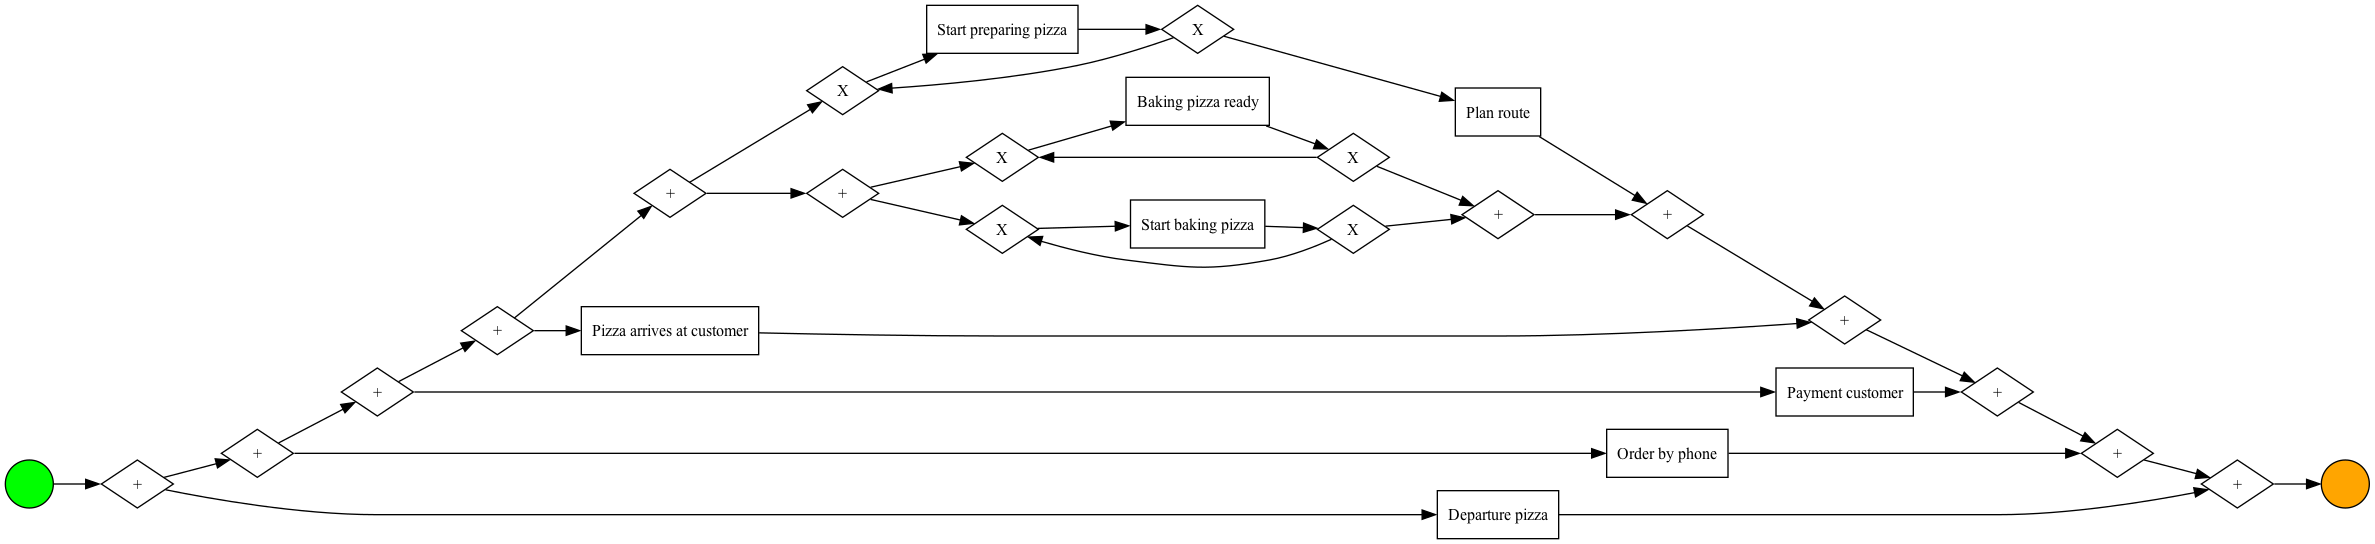


avgProfit = 7.183229813664596 € 
avgCosts = 15.251552795031056 € 
avgRevenue = 22.434782608695652 € 
avgRating = 1.2732919254658386 ⭐️
 medianDirations = 61.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3651.38it/s]




===
Accuracy: 0.5846153846153846
Recall: 0.49358974358974356
Precision: 0.46505376344086025
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.059446744428436865
Daytime: 0.08871244898727647
CustomerType_Adult: 0.020093292978422262
CustomerType_Senior: 0.005779776583520483
CustomerType_Student: 0.02248408442391364
CustomerType_Teenager: 0.02048490190509035
CustomerLocation_Munich District Five: 0.016079138785479858
CustomerLocation_Munich District Four: 0.015867146442754356
CustomerLocation_Munich District One: 0.024309609227860907
CustomerLocation_Munich District Three: 0.020673056668859262
CustomerLocation_Munich District Two: 0.018800462680276554
DistributionChannel_BestOrder Inc.: 0.021334724826367092
DistributionChannel_Deliver Now Holding: 0.021181527434303397
DistributionChannel_Deliveruu Inc.: 0.01184076702125344
DistributionChannel_Feedera SE: 0.02300162312875903
DistributionChannel_Heropizza Lmtd.: 0.008106896768998204
DistributionChannel_Order

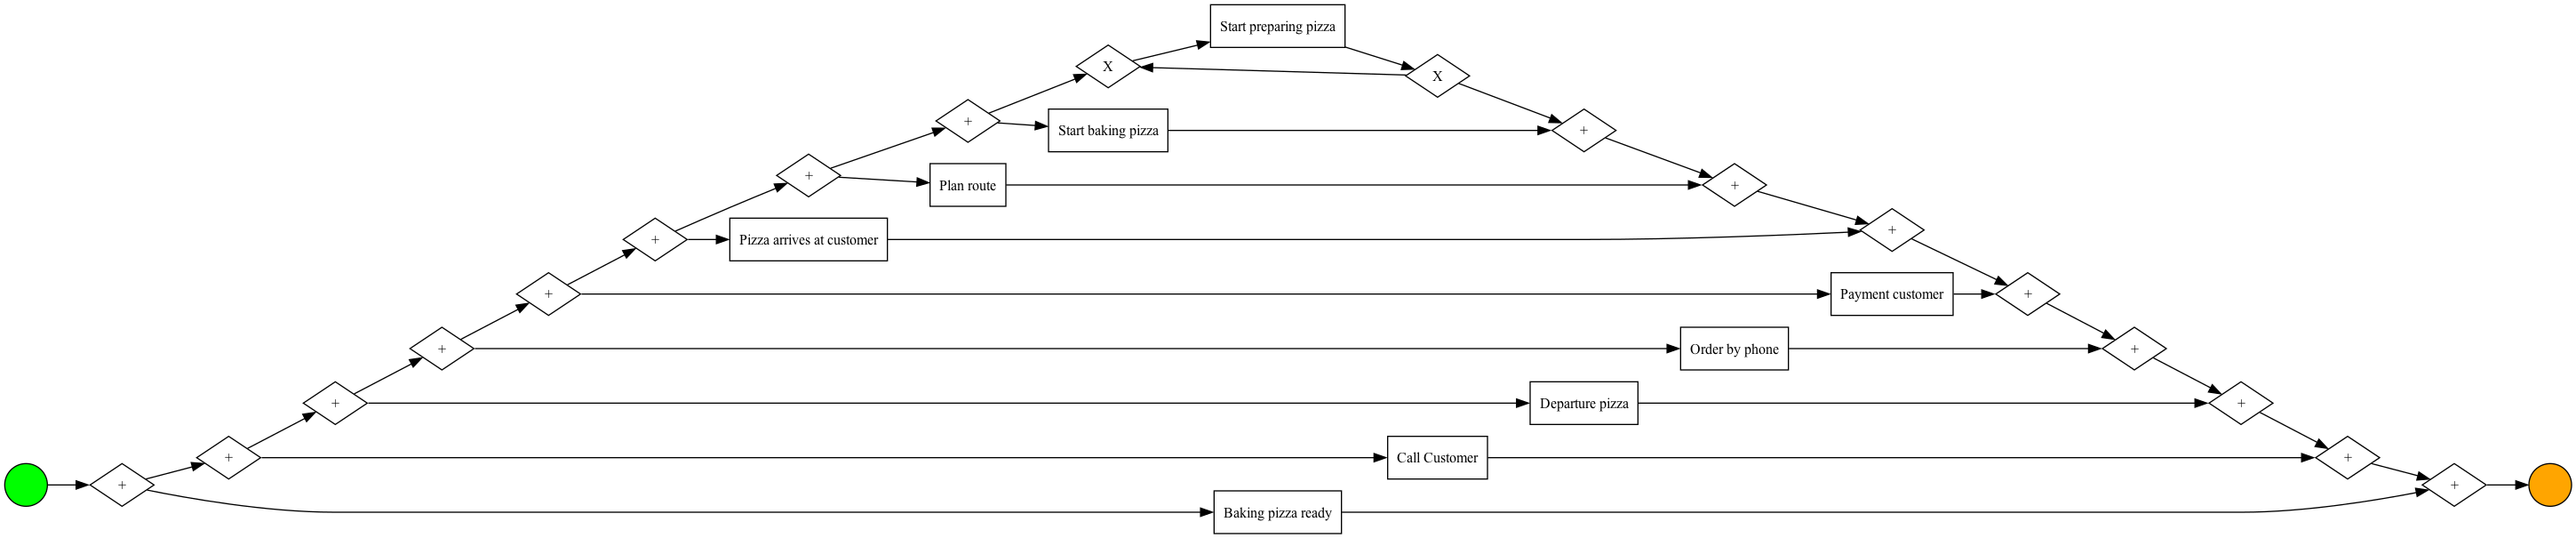


avgProfit = 8.093023255813954 € 
avgCosts = 16.8953488372093 € 
avgRevenue = 24.988372093023255 € 
avgRating = 1.0852713178294573 ⭐️
 medianDirations = 48.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3379.71it/s]




===
Accuracy: 0.5576923076923077
Recall: 0.5196969696969698
Precision: 0.5256410256410257
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.052003480586611354
Daytime: 0.10692108036708353
CustomerType_Adult: 0.01428069364503786
CustomerType_Senior: 0.0067192912099767995
CustomerType_Student: 0.02149585129138479
CustomerType_Teenager: 0.01864086859121595
CustomerLocation_Munich District Five: 0.009987696564085687
CustomerLocation_Munich District Four: 0.024042042221892924
CustomerLocation_Munich District One: 0.02146446476849032
CustomerLocation_Munich District Three: 0.013442699755009824
CustomerLocation_Munich District Two: 0.015309009242299944
DistributionChannel_BestOrder Inc.: 0.021149953640430357
DistributionChannel_Deliver Now Holding: 0.020948316842272333
DistributionChannel_Deliveruu Inc.: 0.013366353436795868
DistributionChannel_Feedera SE: 0.025509340476573227
DistributionChannel_Heropizza Lmtd.: 0.006766820717324512
DistributionChannel_Orderl

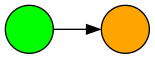


avgProfit = NaT € 
avgCosts = NaT € 
avgRevenue = NaT € 
avgRating = NaT ⭐️
 medianDirations = nan minutes


RandomForrest:
Variant = 5




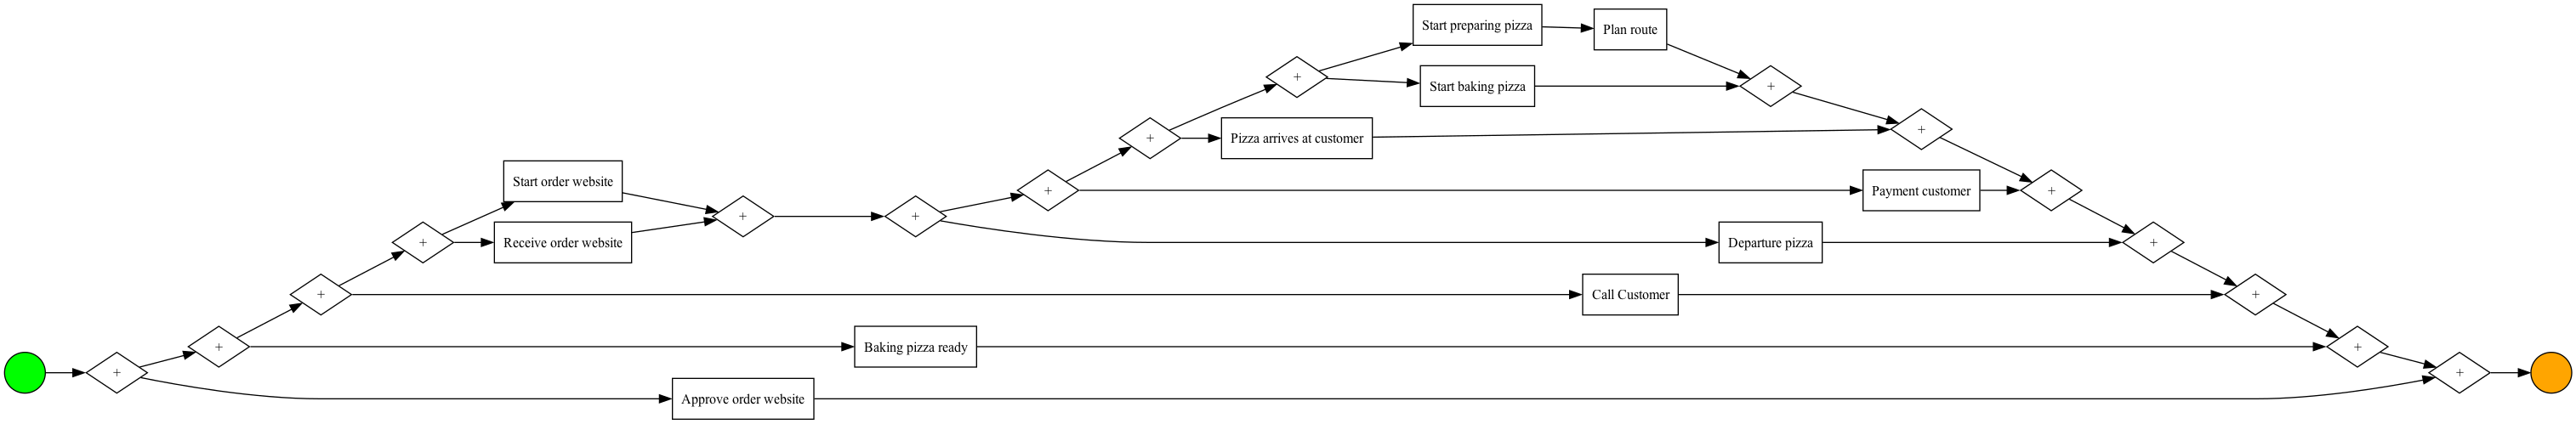


avgProfit = 9.751937984496124 € 
avgCosts = 15.015503875968992 € 
avgRevenue = 24.767441860465116 € 
avgRating = 2.395348837209302 ⭐️
 medianDirations = 56.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3674.72it/s]




===
Accuracy: 0.6538461538461539
Recall: 0.5069444444444444
Precision: 0.5144927536231884
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.05934990317849774
Daytime: 0.08329125080654873
CustomerType_Adult: 0.015166983150012924
CustomerType_Senior: 0.005101974576080921
CustomerType_Student: 0.03546447178248474
CustomerType_Teenager: 0.019904379039304067
CustomerLocation_Munich District Five: 0.012534731211435314
CustomerLocation_Munich District Four: 0.01806838591971173
CustomerLocation_Munich District One: 0.022779672222396862
CustomerLocation_Munich District Three: 0.02112534020693406
CustomerLocation_Munich District Two: 0.011932908708214993
DistributionChannel_BestOrder Inc.: 0.04883380336056649
DistributionChannel_Deliver Now Holding: 0.020954182413072
DistributionChannel_Deliveruu Inc.: 0.013633429233719449
DistributionChannel_Feedera SE: 0.026646657592276978
DistributionChannel_Heropizza Lmtd.: 0.008469755087250747
DistributionChannel_Orderly SE:

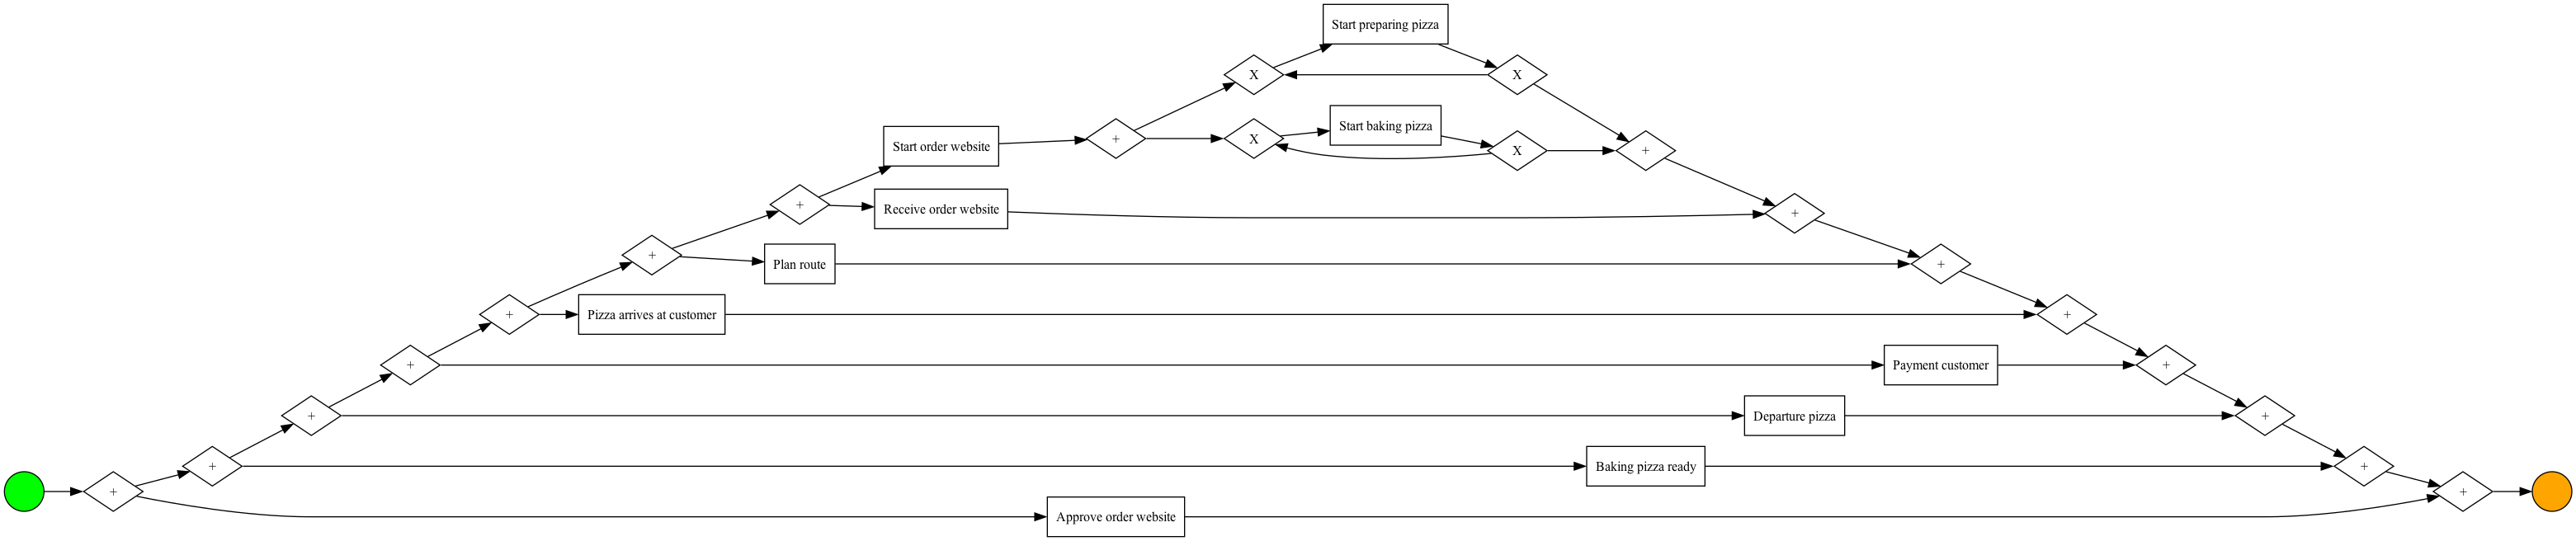


avgProfit = 10.930232558139535 € 
avgCosts = 12.430232558139535 € 
avgRevenue = 23.36046511627907 € 
avgRating = 2.302325581395349 ⭐️
 medianDirations = 60.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3668.24it/s]




===
Accuracy: 0.7777777777777778
Recall: 0.4666666666666667
Precision: 0.4117647058823529
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.05141067803773417
Daytime: 0.08605189707892054
CustomerType_Adult: 0.016731337117422744
CustomerType_Senior: 0.0020275349612713088
CustomerType_Student: 0.014202805449468874
CustomerType_Teenager: 0.019348898688420227
CustomerLocation_Munich District Five: 0.00886653616267242
CustomerLocation_Munich District Four: 0.04893122348416768
CustomerLocation_Munich District One: 0.02522389979918806
CustomerLocation_Munich District Three: 0.014749733868397459
CustomerLocation_Munich District Two: 0.020068363435628695
DistributionChannel_BestOrder Inc.: 0.012825267382898005
DistributionChannel_Deliver Now Holding: 0.017127317961868452
DistributionChannel_Deliveruu Inc.: 0.00661236097897856
DistributionChannel_Feedera SE: 0.026540415360193758
DistributionChannel_Heropizza Lmtd.: 0.021946402222447207
DistributionChannel_Orderly

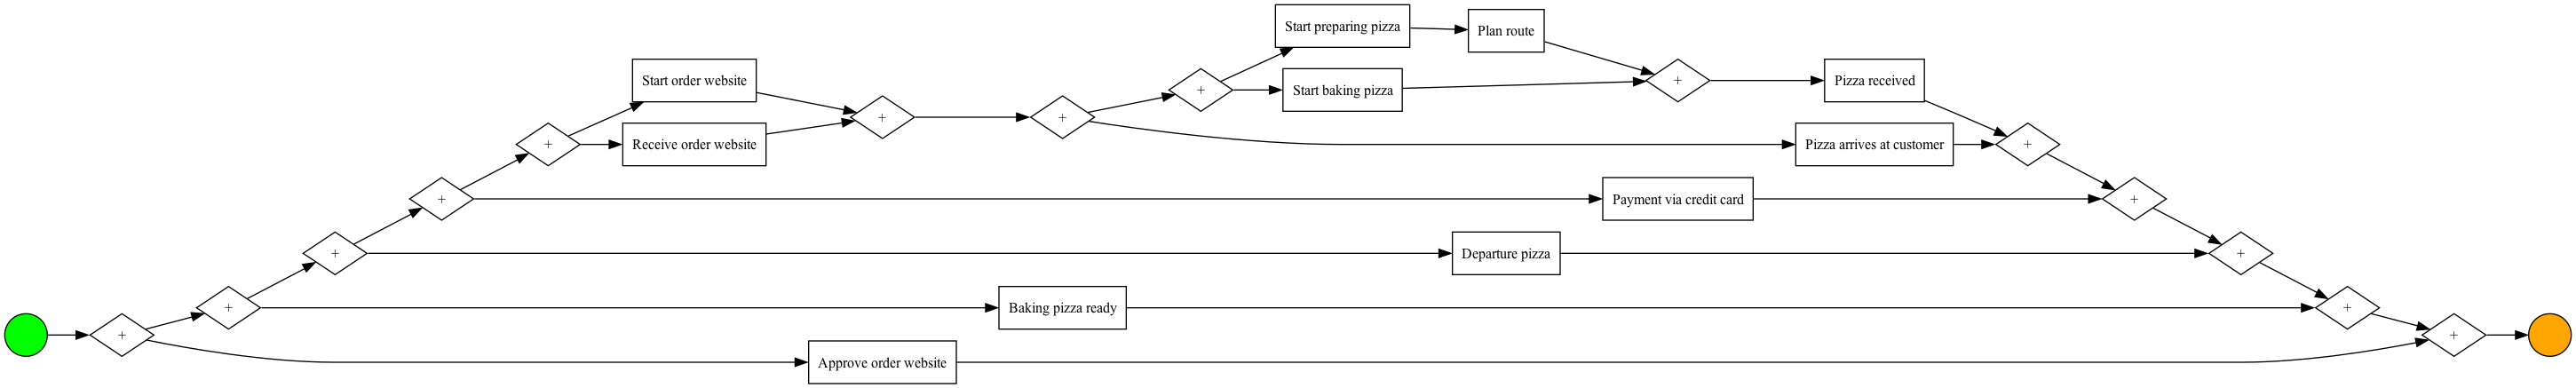


avgProfit = 6.359375 € 
avgCosts = 14.734375 € 
avgRevenue = 21.09375 € 
avgRating = 2.765625 ⭐️
 medianDirations = 57.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3629.82it/s]




===
Accuracy: 0.6153846153846154
Recall: 0.4444444444444444
Precision: 0.3333333333333333
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.06307133223852977
Daytime: 0.07833005971708117
CustomerType_Adult: 0.012503707306847254
CustomerType_Senior: 0.009961394323401492
CustomerType_Student: 0.023258151800994435
CustomerType_Teenager: 0.016693916605946504
CustomerLocation_Munich District Five: 0.011255109871051418
CustomerLocation_Munich District Four: 0.052992124021933484
CustomerLocation_Munich District One: 0.018900308291141598
CustomerLocation_Munich District Three: 0.013523493041429437
CustomerLocation_Munich District Two: 0.014827554989814553
DistributionChannel_BestOrder Inc.: 0.015417820905093154
DistributionChannel_Deliver Now Holding: 0.023047704304450838
DistributionChannel_Deliveruu Inc.: 0.016719160926844914
DistributionChannel_Feedera SE: 0.023361622358239756
DistributionChannel_Heropizza Lmtd.: 0.0005395768025078376
DistributionChannel_Ord

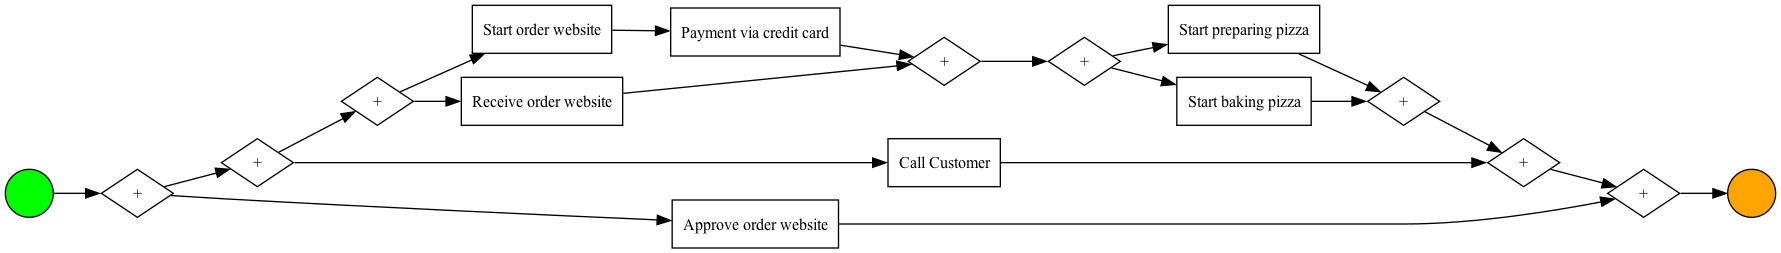


avgProfit = 8.55813953488372 € 
avgCosts = 12.279069767441861 € 
avgRevenue = 20.837209302325583 € 
avgRating = 2.7674418604651163 ⭐️
 medianDirations = 11.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3681.36it/s]




===
Accuracy: 0.7777777777777778
Recall: 0.6785714285714286
Precision: 0.6785714285714286
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.04405633438700868
Daytime: 0.11496083705046699
CustomerType_Adult: 0.008528168639813101
CustomerType_Senior: 0.012014917682941858
CustomerType_Student: 0.01370743868896126
CustomerType_Teenager: 0.01628211560536835
CustomerLocation_Munich District Five: 0.017095028015912853
CustomerLocation_Munich District Four: 0.019110872672691955
CustomerLocation_Munich District One: 0.021199463708237876
CustomerLocation_Munich District Three: 0.007439609954874748
CustomerLocation_Munich District Two: 0.00297406659367628
DistributionChannel_BestOrder Inc.: 0.009607788697343467
DistributionChannel_Deliver Now Holding: 0.02430632935960162
DistributionChannel_Deliveruu Inc.: 0.038447745929014655
DistributionChannel_Feedera SE: 0.018320831383971524
DistributionChannel_Heropizza Lmtd.: 0.007739941750491622
DistributionChannel_Orderly 

In [5]:
queries = [
        #"SELECT * FROM Pizza_Event",
]
for i in range(1, 10):
        queries.append(f"Variant = {i}")

print(queries)

count = 0
for query in queries:
        try:
                query2Info(query)
                count += 1
        except Exception as e:
                if count != 4: # error on variant 5 is expected because it has not event data so the machine learning fails here
                        raise e
        print(query)
        print()
        print()

## Analyse by Customer Satisfaction

['CustomerSatisfaction = 1', 'CustomerSatisfaction = 2', 'CustomerSatisfaction = 3', 'CustomerSatisfaction = 4', 'CustomerSatisfaction = 5']


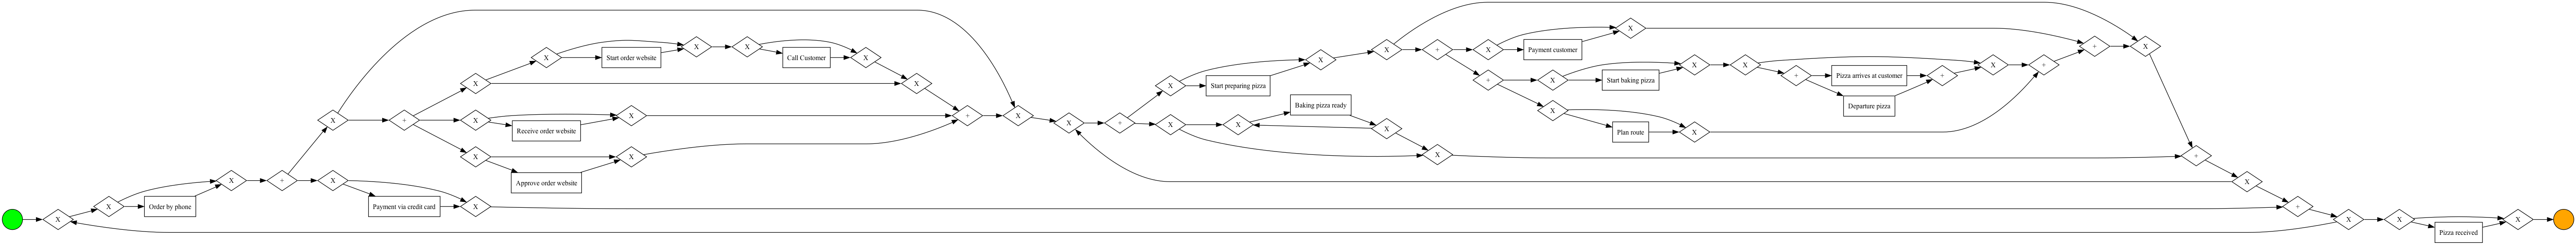


avgProfit = 8.0827182489183 € 
avgCosts = 15.497073046576737 € 
avgRevenue = 23.57979129549504 € 
avgRating = 1.0 ⭐️
 medianDirations = 50.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3641.10it/s]




===
Accuracy: 0.6172839506172839
Recall: 0.503921568627451
Precision: 0.5157894736842106
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.07673957687936413
CustomerType_Adult: 0.018078213588726848
CustomerType_Senior: 0.008804653556124972
CustomerType_Student: 0.020668426747051858
CustomerType_Teenager: 0.0174385158206512
CustomerLocation_Munich District Five: 0.01164708345550279
CustomerLocation_Munich District Four: 0.019539556296858385
CustomerLocation_Munich District One: 0.026357001223671753
CustomerLocation_Munich District Three: 0.016066961091100774
CustomerLocation_Munich District Two: 0.013154460360092648
DistributionChannel_BestOrder Inc.: 0.019248235431262455
DistributionChannel_Deliver Now Holding: 0.020782867637083605
DistributionChannel_Deliveruu Inc.: 0.01047123356025421
DistributionChannel_Feedera SE: 0.0198275459439487
DistributionChannel_Heropizza Lmtd.: 0.016076036283909623
DistributionChannel_Orderly SE: 0.0108231837749

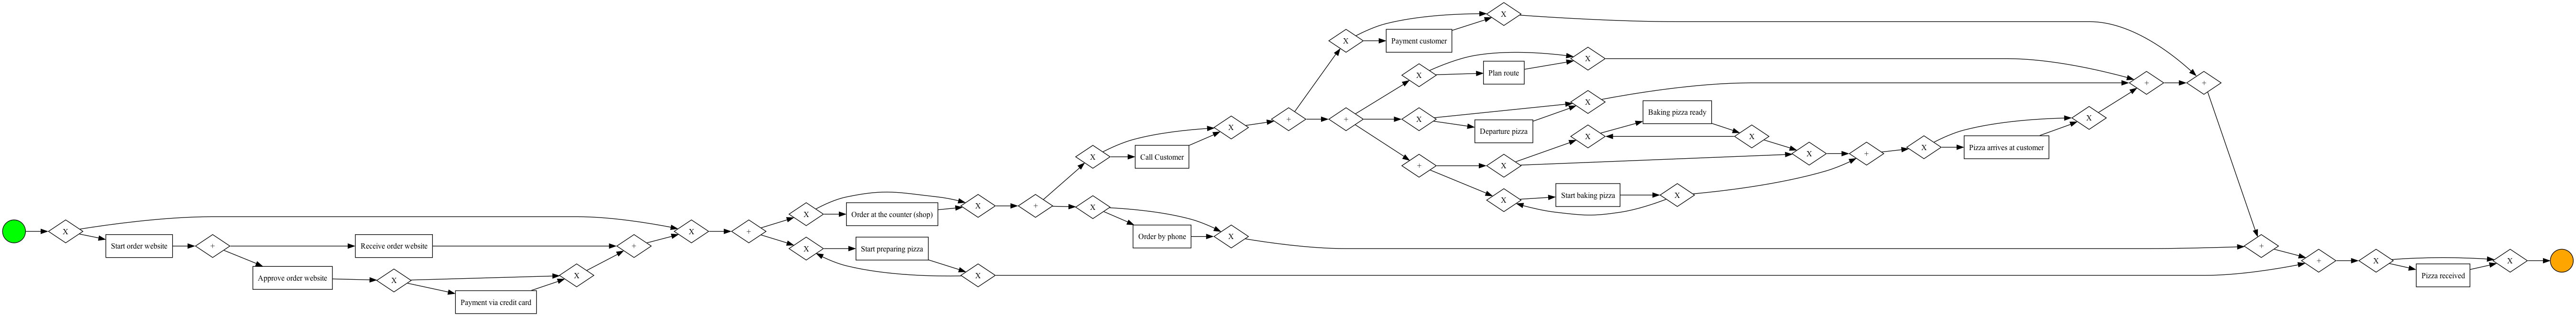


avgProfit = 8.196788990825688 € 
avgCosts = 15.06788990825688 € 
avgRevenue = 23.26467889908257 € 
avgRating = 2.0 ⭐️
 medianDirations = 47.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3676.59it/s]




===
Accuracy: 0.6739130434782609
Recall: 0.5458333333333334
Precision: 0.6705426356589147
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.0751792526130957
CustomerType_Adult: 0.0196881737690608
CustomerType_Senior: 0.005274591079837264
CustomerType_Student: 0.026202185992174862
CustomerType_Teenager: 0.016811837680252118
CustomerLocation_Munich District Five: 0.01029365827150211
CustomerLocation_Munich District Four: 0.02043132755026048
CustomerLocation_Munich District One: 0.023425704029531917
CustomerLocation_Munich District Three: 0.020426851752451708
CustomerLocation_Munich District Two: 0.011720921078866594
DistributionChannel_BestOrder Inc.: 0.024713076469044238
DistributionChannel_Deliver Now Holding: 0.02029186019086861
DistributionChannel_Deliveruu Inc.: 0.010869021863703665
DistributionChannel_Feedera SE: 0.02131307895718181
DistributionChannel_Heropizza Lmtd.: 0.005203807993897994
DistributionChannel_Orderly SE: 0.0082410971792

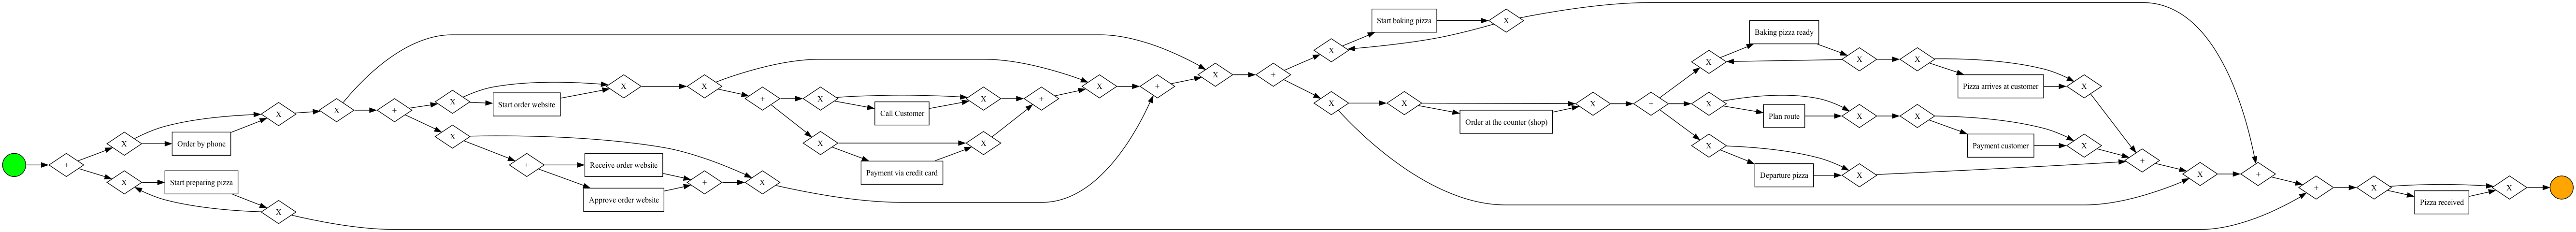


avgProfit = 7.288947677836567 € 
avgCosts = 14.920928865373309 € 
avgRevenue = 22.209876543209877 € 
avgRating = 3.0 ⭐️
 medianDirations = 35.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3695.50it/s]




===
Accuracy: 0.6666666666666666
Recall: 0.5599431818181818
Precision: 0.6883928571428571
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.08348732247523502
CustomerType_Adult: 0.015778633212559685
CustomerType_Senior: 0.005712516255999609
CustomerType_Student: 0.02112297889789769
CustomerType_Teenager: 0.017704126858252803
CustomerLocation_Munich District Five: 0.010881262569570668
CustomerLocation_Munich District Four: 0.017547110816306617
CustomerLocation_Munich District One: 0.022685435136502327
CustomerLocation_Munich District Three: 0.0175687981564234
CustomerLocation_Munich District Two: 0.01884302158103438
DistributionChannel_BestOrder Inc.: 0.02181967087134919
DistributionChannel_Deliver Now Holding: 0.01950143586552876
DistributionChannel_Deliveruu Inc.: 0.018907659530086475
DistributionChannel_Feedera SE: 0.02252317898695917
DistributionChannel_Heropizza Lmtd.: 0.004150120712540337
DistributionChannel_Orderly SE: 0.0071285688180

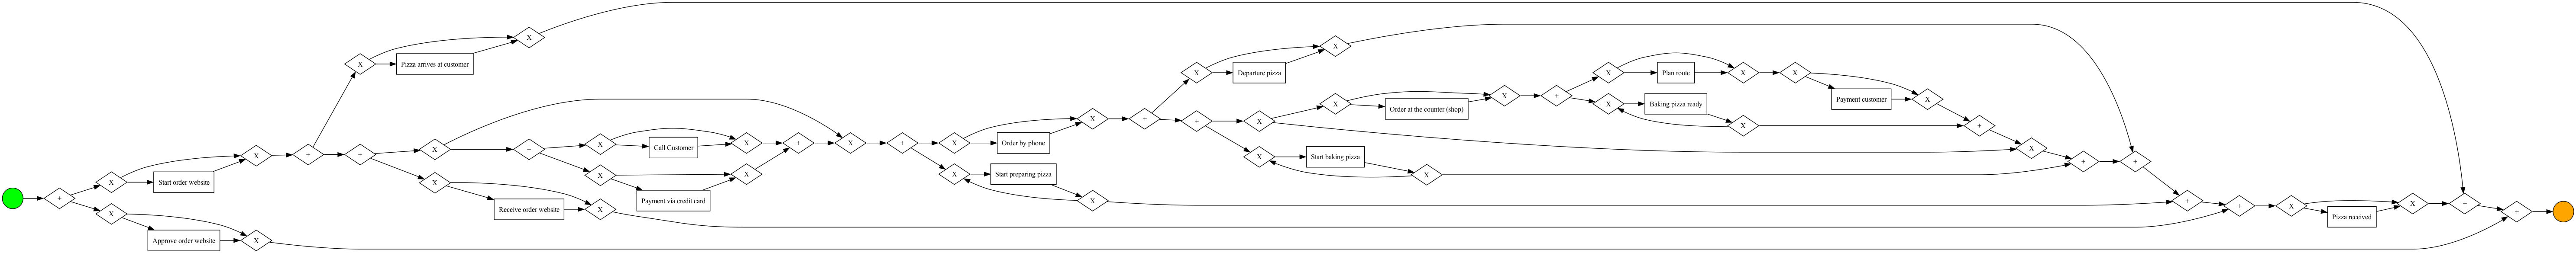


avgProfit = 7.183257918552036 € 
avgCosts = 15.816176470588236 € 
avgRevenue = 22.999434389140273 € 
avgRating = 4.0 ⭐️
 medianDirations = 16.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3672.91it/s]




===
Accuracy: 0.5
Recall: 0.421875
Precision: 0.2755102040816326
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.08024892457116456
CustomerType_Adult: 0.01642799172482299
CustomerType_Senior: 0.008905129907298874
CustomerType_Student: 0.019556978808651832
CustomerType_Teenager: 0.019734189226729593
CustomerLocation_Munich District Five: 0.01265781796091552
CustomerLocation_Munich District Four: 0.017164235213424184
CustomerLocation_Munich District One: 0.023744874161308674
CustomerLocation_Munich District Three: 0.01982953309442461
CustomerLocation_Munich District Two: 0.01328034062885009
DistributionChannel_BestOrder Inc.: 0.019678571052829236
DistributionChannel_Deliver Now Holding: 0.026559763814274048
DistributionChannel_Deliveruu Inc.: 0.019899532497291646
DistributionChannel_Feedera SE: 0.01848272905488492
DistributionChannel_Heropizza Lmtd.: 0.008883815593757323
DistributionChannel_Orderly SE: 0.014165859040817214
DistributionChann

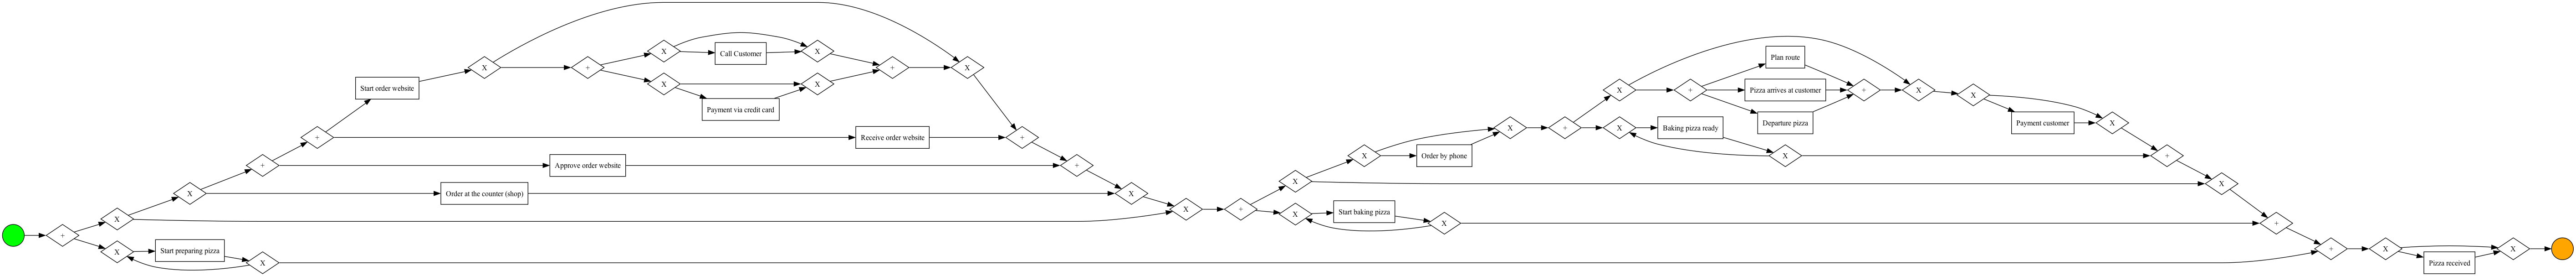


avgProfit = 9.03257529194837 € 
avgCosts = 14.558696988322065 € 
avgRevenue = 23.591272280270438 € 
avgRating = 5.0 ⭐️
 medianDirations = 33.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3687.43it/s]




===
Accuracy: 0.5952380952380952
Recall: 0.47777777777777775
Precision: 0.4407894736842105
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.07376641728275782
CustomerType_Adult: 0.014125193296835594
CustomerType_Senior: 0.010084401072462224
CustomerType_Student: 0.026593130731136956
CustomerType_Teenager: 0.026705398905367744
CustomerLocation_Munich District Five: 0.01180876240339037
CustomerLocation_Munich District Four: 0.012337936362877807
CustomerLocation_Munich District One: 0.034963436645992475
CustomerLocation_Munich District Three: 0.0175590913309421
CustomerLocation_Munich District Two: 0.023484809911168632
DistributionChannel_BestOrder Inc.: 0.0191738224242569
DistributionChannel_Deliver Now Holding: 0.016221740977598143
DistributionChannel_Deliveruu Inc.: 0.010594536078685345
DistributionChannel_Feedera SE: 0.02697746788923488
DistributionChannel_Heropizza Lmtd.: 0.0045738766148292875
DistributionChannel_Orderly SE: 0.0132851216

In [6]:
queries = []
for i in range(1,6):
        queries.append(f"CustomerSatisfaction = {i}")

print(queries)

for query in queries:
        query2Info(query)
        print(query)
        print()
        print()

## Analyse by Customer IsSatisfied

['CustomerSatisfaction >= 3', 'CustomerSatisfaction <= 3']


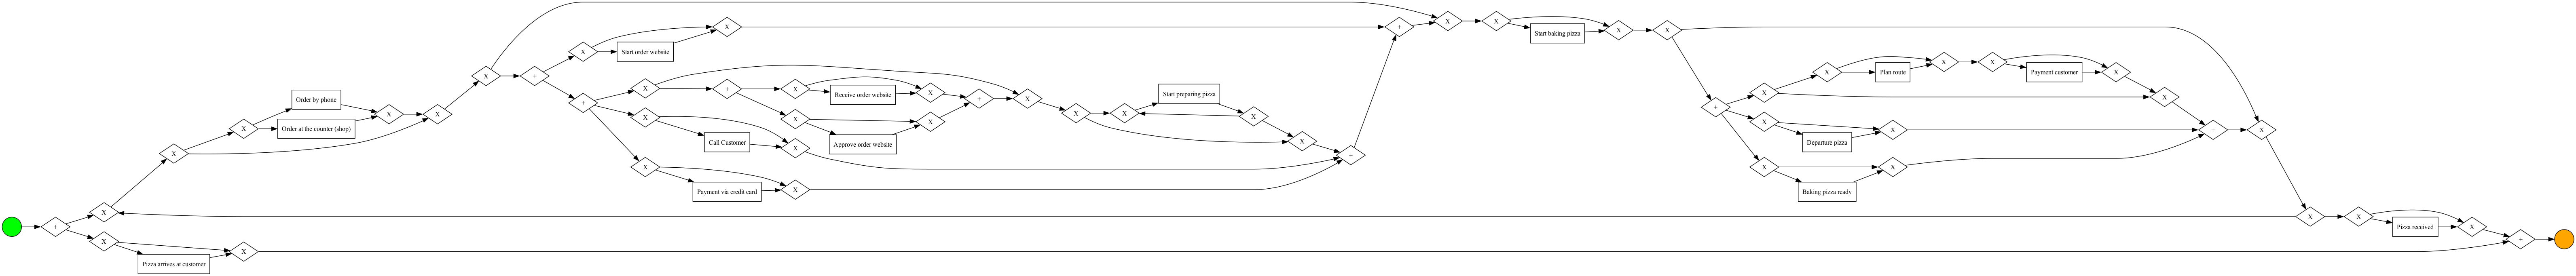


avgProfit = 7.6788288951007795 € 
avgCosts = 15.067088421362365 € 
avgRevenue = 22.745917316463146 € 
avgRating = 3.7388553773723703 ⭐️
 medianDirations = 28.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3675.63it/s]




===
Accuracy: 0.6043956043956044
Recall: 0.4647926140278352
Precision: 0.4244306418219462
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.03738419463153925
Daytime: 0.08439299266528824
CustomerType_Adult: 0.013604532584970304
CustomerType_Senior: 0.007774631718975327
CustomerType_Student: 0.020993780343775623
CustomerType_Teenager: 0.01456262480847914
CustomerLocation_Munich District Five: 0.01170887998092948
CustomerLocation_Munich District Four: 0.01572497990791911
CustomerLocation_Munich District One: 0.02241300574287606
CustomerLocation_Munich District Three: 0.017793178497731654
CustomerLocation_Munich District Two: 0.017313330077341652
DistributionChannel_BestOrder Inc.: 0.018482716643866796
DistributionChannel_Deliver Now Holding: 0.01960951291523129
DistributionChannel_Deliveruu Inc.: 0.015764167244242178
DistributionChannel_Feedera SE: 0.020571978433820165
DistributionChannel_Heropizza Lmtd.: 0.005518464988611882
DistributionChannel_Orderly S

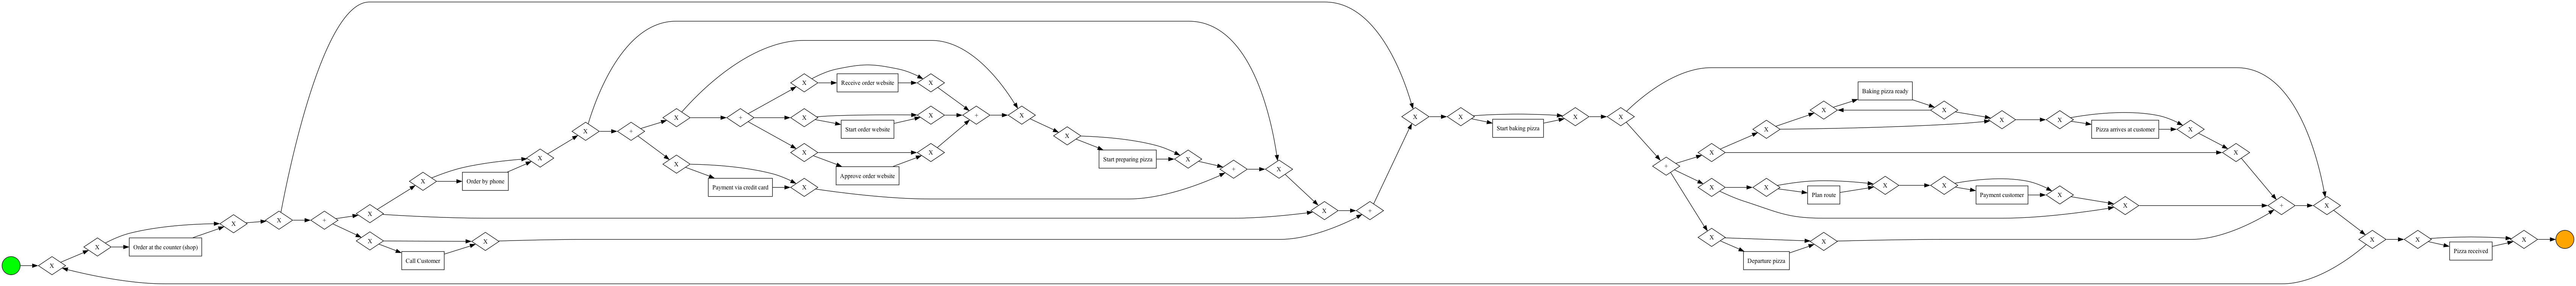


avgProfit = 7.898985016916384 € 
avgCosts = 15.257854035766071 € 
avgRevenue = 23.156839052682454 € 
avgRating = 1.4898501691638473 ⭐️
 medianDirations = 47.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3653.54it/s]




===
Accuracy: 0.6346863468634686
Recall: 0.48174366616989567
Precision: 0.43859649122807015
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.045797304376697705
Daytime: 0.07813766309911102
CustomerType_Adult: 0.016220707897722553
CustomerType_Senior: 0.00743842477622985
CustomerType_Student: 0.02173000434997572
CustomerType_Teenager: 0.017013010149676832
CustomerLocation_Munich District Five: 0.010769532392835608
CustomerLocation_Munich District Four: 0.015530442073208863
CustomerLocation_Munich District One: 0.021348395127581635
CustomerLocation_Munich District Three: 0.016992389408484763
CustomerLocation_Munich District Two: 0.014680851402325746
DistributionChannel_BestOrder Inc.: 0.01813510384906172
DistributionChannel_Deliver Now Holding: 0.019751519693239506
DistributionChannel_Deliveruu Inc.: 0.01197396935920206
DistributionChannel_Feedera SE: 0.02024056849091571
DistributionChannel_Heropizza Lmtd.: 0.009082205461307127
DistributionChannel_Orderl

In [7]:
queries = [f"CustomerSatisfaction >= 3", f"CustomerSatisfaction <= 3"]

print(queries)

for query in queries:
        query2Info(query)
        print(query)
        print()
        print()

## Analyse by Profit

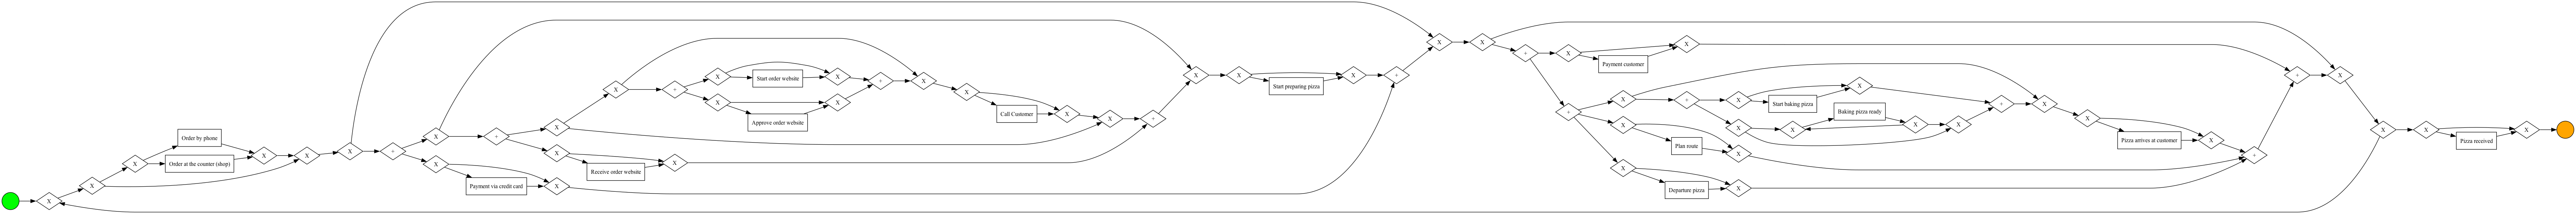


avgProfit = 19.102536997885835 € 
avgCosts = 8.920046127234288 € 
avgRevenue = 28.02258312512012 € 
avgRating = 2.119450317124736 ⭐️
 medianDirations = 43.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3680.56it/s]




===
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.0
CustomerType_Adult: 0.0
CustomerType_Senior: 0.0
CustomerType_Student: 0.0
CustomerType_Teenager: 0.0
CustomerLocation_Munich District Five: 0.0
CustomerLocation_Munich District Four: 0.0
CustomerLocation_Munich District One: 0.0
CustomerLocation_Munich District Three: 0.0
CustomerLocation_Munich District Two: 0.0
DistributionChannel_BestOrder Inc.: 0.0
DistributionChannel_Deliver Now Holding: 0.0
DistributionChannel_Deliveruu Inc.: 0.0
DistributionChannel_Feedera SE: 0.0
DistributionChannel_Heropizza Lmtd.: 0.0
DistributionChannel_Orderly SE: 0.0
DistributionChannel_TownExpress Inc.: 0.0
Weekday_Friday: 0.0
Weekday_Monday: 0.0
Weekday_Saturday: 0.0
Weekday_Sunday: 0.0
Weekday_Thursday: 0.0
Weekday_Tuesday: 0.0
Weekday_Wednesday: 0.0
CostFactor_Chef 1: 0.0
CostFactor_Chef 2: 0.0
CostFactor_Delivery Guy 1: 0.0
CostFactor_Delivery Guy 2: 0.0
CostF

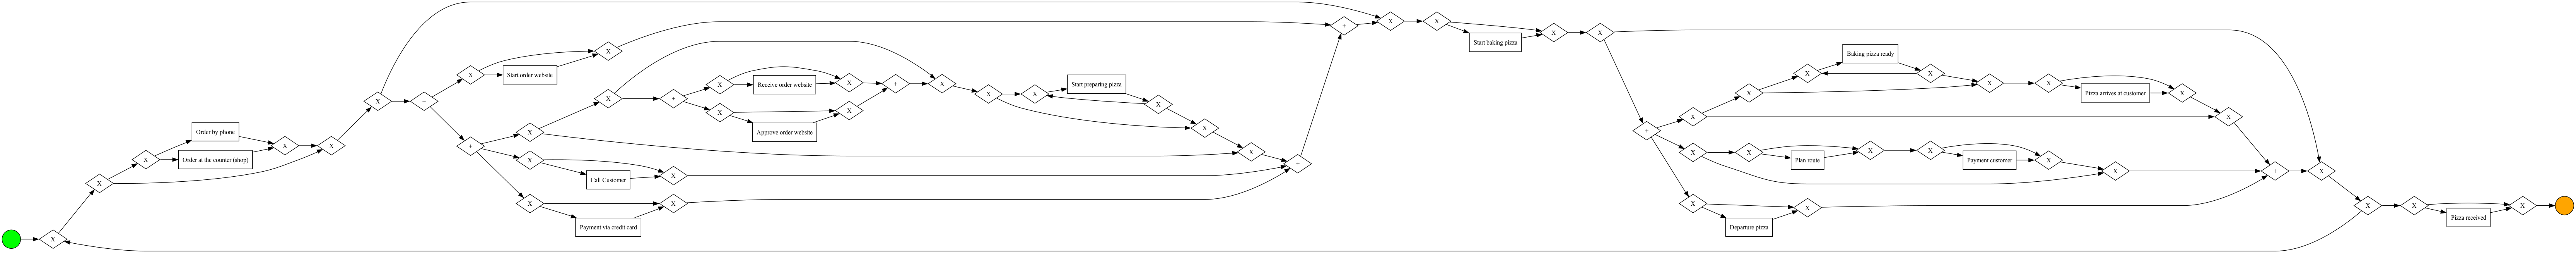


avgProfit = -14.937258097372174 € 
avgCosts = 28.940313709513138 € 
avgRevenue = 14.003055612140965 € 
avgRating = 2.157262171521695 ⭐️
 medianDirations = 42.0 minutes


RandomForrest:




parsing log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 3386.95it/s]




===
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
----
Column: IsOrderProfitable
----
Feature Importances:
CustomerSatisfaction: 0.0
Daytime: 0.0
CustomerType_Adult: 0.0
CustomerType_Senior: 0.0
CustomerType_Student: 0.0
CustomerType_Teenager: 0.0
CustomerLocation_Munich District Five: 0.0
CustomerLocation_Munich District Four: 0.0
CustomerLocation_Munich District One: 0.0
CustomerLocation_Munich District Three: 0.0
CustomerLocation_Munich District Two: 0.0
DistributionChannel_BestOrder Inc.: 0.0
DistributionChannel_Deliver Now Holding: 0.0
DistributionChannel_Deliveruu Inc.: 0.0
DistributionChannel_Feedera SE: 0.0
DistributionChannel_Heropizza Lmtd.: 0.0
DistributionChannel_Orderly SE: 0.0
DistributionChannel_TownExpress Inc.: 0.0
Weekday_Friday: 0.0
Weekday_Monday: 0.0
Weekday_Saturday: 0.0
Weekday_Sunday: 0.0
Weekday_Thursday: 0.0
Weekday_Tuesday: 0.0
Weekday_Wednesday: 0.0
CostFactor_Chef 1: 0.0
CostFactor_Chef 2: 0.0
CostFactor_Delivery Guy 1: 0.0
CostFactor_Delivery Guy 2: 0.0
CostF

In [8]:
queries = ["Profit > 0", "Profit < 0"]

for query in queries:
        query2Info(query)
        print(query)
        print()
        print()

# Analyse Influence factors on Profit

## Analyse Influence on profit segmented on profit

In [9]:
profitByVariant = pd.read_sql_query("""SELECT Variant, avg(Revenue - Costs) AS AvgProfit
FROM Pizza_Case
GROUP BY Variant""", con)
profitByVariant


,Variant,AvgProfit
0,1,7.932961
1,2,6.656331
2,3,7.183230
3,4,8.093023
4,5,5.029070
5,6,9.751938
6,7,10.930233
7,8,6.359375
8,9,8.558140


In [10]:
def profitBy(attribute, where="1=1"):
    return pd.read_sql_query(f"""SELECT {attribute}, avg(Revenue - Costs) AS AvgProfit, *
    FROM Pizza_Case
    where {where}
    GROUP BY {attribute}
    order by AvgProfit
    """, con)

In [11]:
def analyseProfitBy(column, wheres=["1=1"], keepFields=[], keepAll=False):
    assert type(keepFields) == list, "field list must be LIST not " + str(type(keepFields))
    assert type(wheres) == list, "where must be a list of where clauses not "+str(type(wheres))
    profitByVariant = pd.DataFrame()
    for i in wheres:
        res = profitBy(column, i)
        profitByVariant = pd.concat([profitByVariant, res])
    keepCols = profitByVariant[keepFields + ["AvgProfit", column]]
    # delete all rows where avgprofit is bigger than 0
    if keepAll == False:
        keepCols = keepCols[keepCols["AvgProfit"] < 0]
    return keepCols


In [12]:
analyseProfitBy("CustomerType", [f"Variant = {i}" for i in range(0, 9)], ["Variant"])

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,CustomerType,CustomerType


In [13]:
analyseProfitBy("CustomerLocation", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,CustomerLocation,CustomerLocation
0,1,6.527559,Munich District One,Munich District One
1,1,7.037736,Munich District Four,Munich District Four
2,1,7.122449,Munich District Five,Munich District Five
3,1,10.091954,Munich District Two,Munich District Two
4,1,10.659574,Munich District Three,Munich District Three
0,2,2.896552,Munich District Five,Munich District Five
1,2,5.112676,Munich District Three,Munich District Three
2,2,5.309942,Munich District One,Munich District One
3,2,10.000000,Munich District Two,Munich District Two
4,2,11.129630,Munich District Four,Munich District Four


In [14]:
analyseProfitBy("DistributionChannel", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,DistributionChannel,DistributionChannel
0,1,3.784314,Deliveruu Inc.,Deliveruu Inc.
1,1,5.828571,Deliver Now Holding,Deliver Now Holding
2,1,6.863636,Orderly SE,Orderly SE
3,1,7.678571,TownExpress Inc.,TownExpress Inc.
4,1,8.677419,Feedera SE,Feedera SE
5,1,10.333333,Heropizza Lmtd.,Heropizza Lmtd.
6,1,10.992063,BestOrder Inc.,BestOrder Inc.
0,2,-2.444444,Heropizza Lmtd.,Heropizza Lmtd.
1,2,-0.058824,Orderly SE,Orderly SE
2,2,6.510417,BestOrder Inc.,BestOrder Inc.


In [15]:

analyseProfitBy("Weekday", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,Weekday,Weekday
0,1,0.812500,Tuesday,Tuesday
1,1,6.444444,Monday,Monday
2,1,6.550000,Thursday,Thursday
3,1,6.978102,Saturday,Saturday
4,1,7.708333,Sunday,Sunday
5,1,8.894737,Wednesday,Wednesday
6,1,10.078571,Friday,Friday
0,2,3.176471,Thursday,Thursday
1,2,3.882353,Friday,Friday
2,2,5.230159,Sunday,Sunday


In [16]:
analyseProfitBy("CostFactor", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,CostFactor,CostFactor
0,1,4.044444,Delivery Guy 2,Delivery Guy 2
1,1,6.451327,Chef 2,Chef 2
2,1,7.824561,Waiter,Waiter
3,1,7.863636,Delivery Scooters,Delivery Scooters
4,1,8.111111,Ingredients,Ingredients
...,...,...,...,...
4,8,3.666667,Waiter,Waiter
5,8,4.076923,Chef 2,Chef 2
6,8,10.222222,Chef 1,Chef 1
7,8,14.150000,Ingredients,Ingredients


In [17]:
analyseProfitBy("PizzaSize", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,PizzaSize,PizzaSize
0,1,7.609649,Small,Small
1,1,7.978378,Large,Large
2,1,8.459677,Medium,Medium
0,2,6.342857,Medium,Medium
1,2,6.471698,Large,Large
2,2,6.954545,Small,Small
0,3,5.035211,Small,Small
1,3,7.964706,Large,Large
2,3,9.694737,Medium,Medium
0,4,3.018519,Medium,Medium


In [18]:

analyseProfitBy("PizzaType", [f"Variant = {i}" for i in range(0, 9)], ["Variant"], keepAll=True)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])


,Variant,AvgProfit,PizzaType,PizzaType
0,1,6.163636,Speciale,Speciale
1,1,6.500000,Paprika,Paprika
2,1,7.275229,Funghi,Funghi
3,1,7.784314,Magherita,Magherita
4,1,8.125828,Salami,Salami
5,1,9.260870,Veggie,Veggie
6,1,10.682540,Calzone,Calzone
0,2,0.466667,Paprika,Paprika
1,2,4.428571,Speciale,Speciale
2,2,5.107143,Salami,Salami


In [19]:

res = []

res.append(analyseProfitBy("CustomerType", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("CustomerLocation", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("DistributionChannel", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("Weekday", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("CostFactor", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("PizzaSize", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))

res.append(analyseProfitBy("PizzaType", [f"Variant = {i}" for i in range(0, 9)], ["Variant"]))



/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])
/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  profitByVariant = pd.concat([profitByVariant, res])
/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_10584/2554609236.py:7: FutureWarning: The behavior of DataFrame concatenation wit

In [20]:
res

[Empty DataFrame
 Columns: [Variant, AvgProfit, CustomerType, CustomerType]
 Index: [],
   Variant  AvgProfit      CustomerLocation      CustomerLocation
 0       8 -10.571429  Munich District Four  Munich District Four,
   Variant  AvgProfit DistributionChannel DistributionChannel
 0       2  -2.444444     Heropizza Lmtd.     Heropizza Lmtd.
 1       2  -0.058824          Orderly SE          Orderly SE
 0       5  -2.142857          Orderly SE          Orderly SE
 1       5  -1.875000          Feedera SE          Feedera SE
 0       7 -10.000000          Orderly SE          Orderly SE
 1       7  -0.666667     Heropizza Lmtd.     Heropizza Lmtd.
 0       8  -2.500000          Orderly SE          Orderly SE,
   Variant  AvgProfit    Weekday    Weekday
 0       4  -3.600000     Monday     Monday
 1       4  -0.916667   Thursday   Thursday
 0       5  -5.909091  Wednesday  Wednesday
 1       5  -5.000000    Tuesday    Tuesday
 2       5  -0.250000     Monday     Monday
 0       7  -3.000